In [218]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation

#node class -----------------------------------
class node:
    #node constructor
    def __init__(self, Id, x_coordinate, y_coordinate):
        self.Id = Id
        self.x_coordinate = x_coordinate
        self.y_coordinate = y_coordinate
    #End Init
#End Class node

#slope
def slope(x1, y1, x2, y2):
    return (y2 - y1)/(x2 - x1)
#End slope

#y-intercept
def y_intercept(m, x, y):
    return y - m * x
#End y_intercept

#distance between two points
def distance(x1, y1, x2, y2):
    d = math.sqrt(((x2 - x1)**2) + ((y2 - y1)**2))
    return d
#End distance

#Perpendicular distance
#Is node within perpendicular range of the edge
#Yes, find perpendicular distance
#No, find nearest visited node
def edgeOrNodeDistance(x1, y1, x2, y2, node, visitedNodes):
    m = slope(x1, y1, x2, y2) # slope of edge
    b = y_intercept(m, x1, y1) # y intercept of edge
    m1 = -1 / m # perpendicular slope
    b1 = y_intercept(m1, node.x_coordinate, node.y_coordinate)
    b2 = y_intercept(m1, x1, y1) # y intercept
    b3 = y_intercept(m1, x2, y2) # y intercept
    if x1 < x2:
        a2 = m1 * node.x_coordinate + b2 # y = mx + b
        a3 = m1 * node.x_coordinate + b3 # y = mx + b
    else:
        a2 = m1 * node.x_coordinate + b3 # y = mx + b
        a3 = m1 * node.x_coordinate + b2 # y = mx + b
    
    if node.y_coordinate <= a2 and node.y_coordinate >= a3: # inbetween peprpendicular line of two connected nodes
        # find perpendicular distance of the node
        x = (b1 - b) / (m - m1)# x_coordinate where perpendicular line intersects
        y = m * x + b # y_coordinate where perpendicular line intersects
        return distance(node.x_coordinate, node.y_coordinate, x, y)            
    else:
        # find distance to nearest node
        distanceToNode = -1
        for point in visitedNodes:
            #print(node.Id)
            if distanceToNode == -1:
                distanceToNode = distance(node.x_coordinate, node.y_coordinate, point.x_coordinate, point.y_coordinate)
            else:
                d = distance(node.x_coordinate, node.y_coordinate, point.x_coordinate, point.y_coordinate)
                if d < distanceToNode:
                    distanceToNode = d
        return distanceToNode

#Begin main
visitedNodes = []
#open file
try:
    file = open('Random30.tsp', 'r')
except FileNotFoundError:
    print('The file was not found!')
    
#read lines with node coordinates
lines = np.array(file.readlines())[7:]
node_arr = []
setOfNode = []
for line in range(len(lines)):
    x = lines[line].split()
    #node starts from 0 instead of 1
    node_arr.append(node(int(x[0]) - 1, float(x[1]), float(x[2])))
    setOfNode.append(int(x[0]) - 1)

#find very first node and last node (x_coordinate) in a graph (Starting Edge)
x_min_node = 0
x_max_node = 0
x_min_value = 10000
x_max_value = -1
for i in range(len(node_arr)):
    if node_arr[i].x_coordinate < x_min_value:
        x_min_value = node_arr[i].x_coordinate
        x_min_node = i
    if node_arr[i].x_coordinate > x_max_value:
        x_max_value = node_arr[i].x_coordinate
        x_max_node = i
visitedNodes.append(node_arr[x_min_node])
visitedNodes.append(node_arr[x_max_node])
visitedNodes.append(visitedNodes[0])

# find the nearest node from the starting edge
# for x in range(len(visitedNodes) - 1):
z = 0
# while len(node_arr)+1 != len(visitedNodes):
while z < 10:
    nearestEdgeNode = -1
    nodeEdgeDistance = -1
    visitedNodeInsertIndex = -1
    for i in range(len(visitedNodes) - 1):
        for x in range(len(node_arr)):
            if node_arr[x] not in visitedNodes:
                dist = edgeOrNodeDistance(visitedNodes[i].x_coordinate, visitedNodes[i].y_coordinate, visitedNodes[i + 1].x_coordinate, visitedNodes[i + 1].y_coordinate, node_arr[x], visitedNodes)
                if nearestEdgeNode == -1:
                    nearestEdgeNode = x
                    nodeEdgeDistance = dist
                    visitedNodeInsertIndex = i + 1
                elif dist < nodeEdgeDistance:
                    nearestEdgeNode = x
                    nodeEdgeDistance = dist
                    visitedNodeInsertIndex = i + 1
    if nearestEdgeNode != -1 and visitedNodeInsertIndex != -1:
        visitedNodes.insert(visitedNodeInsertIndex, node_arr[nearestEdgeNode])
    apple = []
    for i in visitedNodes:
        apple.append(i.Id)     
    print(apple)
    z = z + 1

[4, 13, 20, 4]
[4, 13, 1, 20, 4]
[4, 13, 1, 20, 22, 4]
[4, 13, 1, 20, 2, 22, 4]
[4, 25, 13, 1, 20, 2, 22, 4]
[4, 25, 13, 1, 16, 20, 2, 22, 4]
[4, 25, 13, 1, 10, 16, 20, 2, 22, 4]
[4, 25, 13, 1, 10, 15, 16, 20, 2, 22, 4]
[4, 25, 13, 1, 11, 10, 15, 16, 20, 2, 22, 4]
[4, 17, 25, 13, 1, 11, 10, 15, 16, 20, 2, 22, 4]


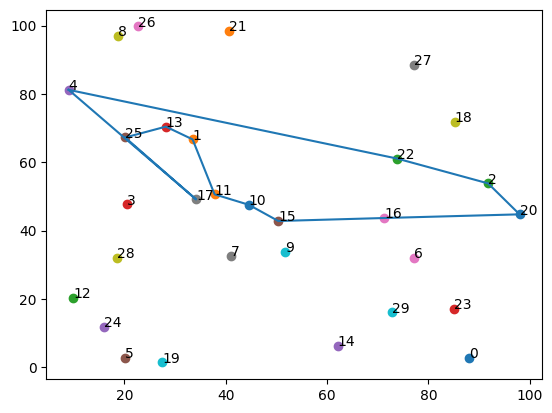

In [219]:
# scatter plot all points
x = []
y = []
for i in range(len(node_arr)):
    x.append(node_arr[i].x_coordinate)
    y.append(node_arr[i].y_coordinate)
    
for i in range(len(node_arr)):
    plt.scatter(node_arr[i].x_coordinate, node_arr[i].y_coordinate)
    plt.text(node_arr[i].x_coordinate, node_arr[i].y_coordinate, node_arr[i].Id)

x_points = []
y_points = []
for i in range(len(visitedNodes)):
    x_points.append(visitedNodes[i].x_coordinate)
    y_points.append(visitedNodes[i].y_coordinate)

plt.plot(x_points, y_points)
